In [1]:
import pandas as pd

# for output3big
thread_nums = [1, 4, 6, 8, 10, 12, 14, 16, 18, 20]
update_ratios = [0, 10, 30, 50, 80, 100]
list_sizes = [100, 1000, 10000]

# For output0, output1 and output2
# thread_nums = [1, 4, 6, 8, 10, 12]
# update_ratios = [0, 10, 100]

index = pd.MultiIndex.from_product(
    [['Coarse-grained locking', 'Hand-Over-Hand locking', 'Lazy Linked List '],
     thread_nums,
     update_ratios,
     list_sizes],
    names=['type', 'thread_num', 'update_ratio', 'list_size'])

# Adjust if want to use another measurements
with open('output3big.txt', 'r') as file:
    values = [int(float(line.strip())) for line in file]

# Create the DataFrame
df = pd.DataFrame(values, index=index, columns=['throughput'])

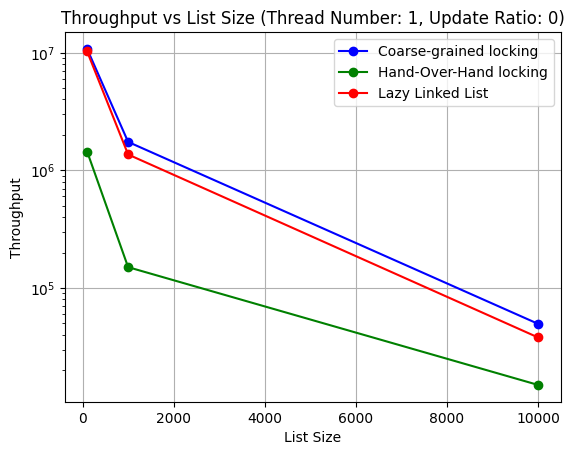

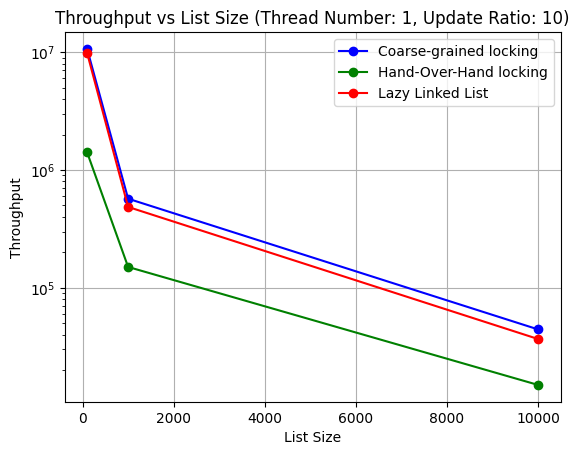

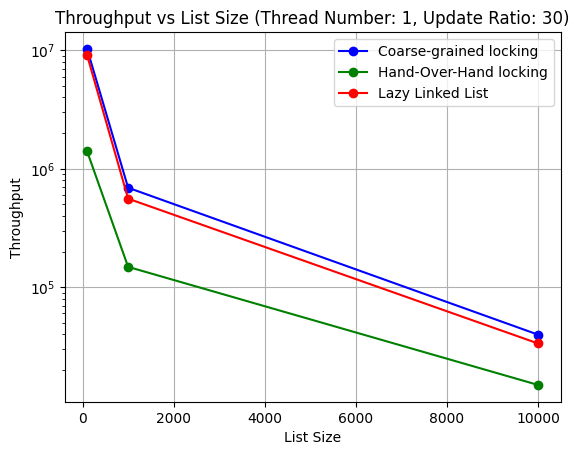

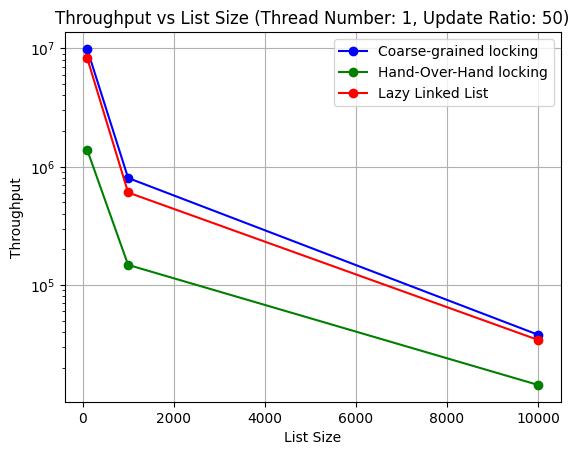

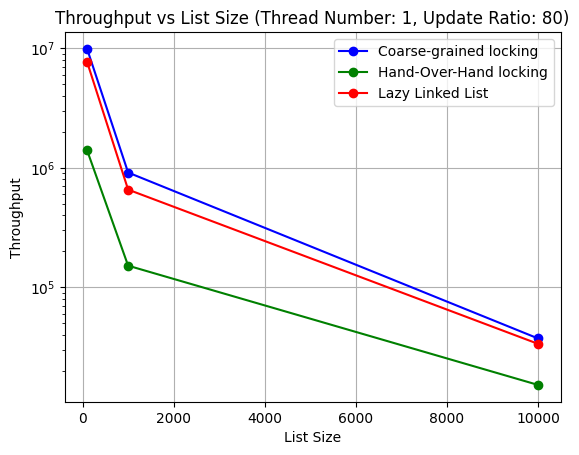

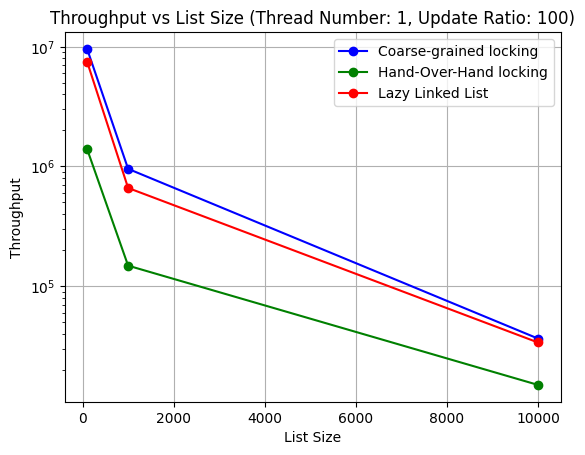

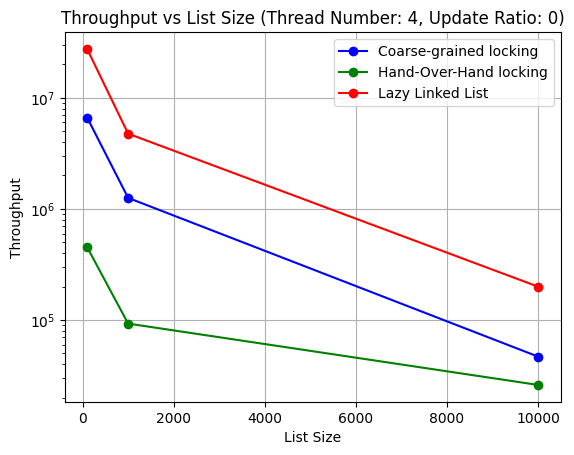

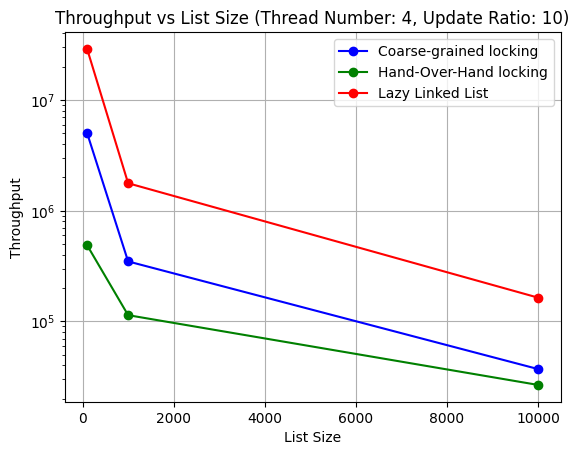

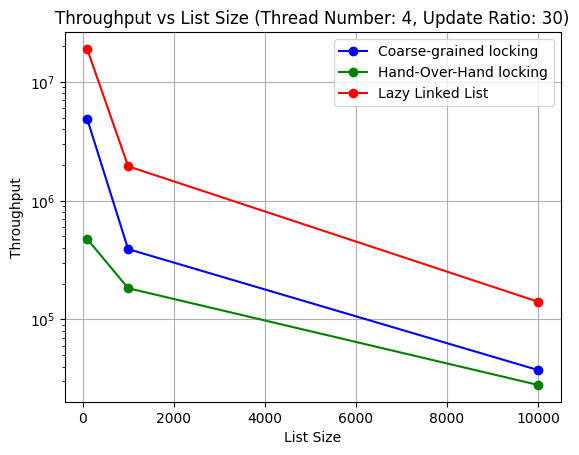

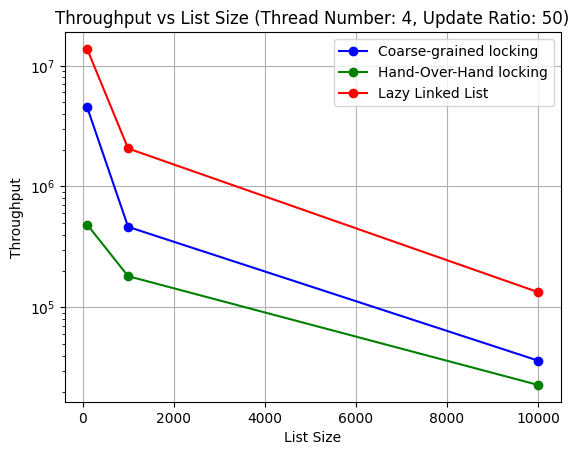

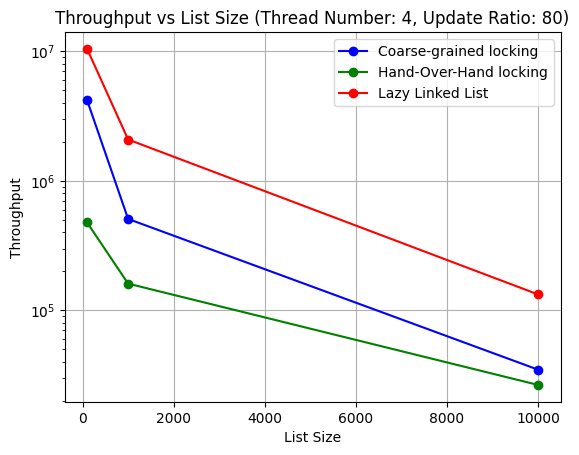

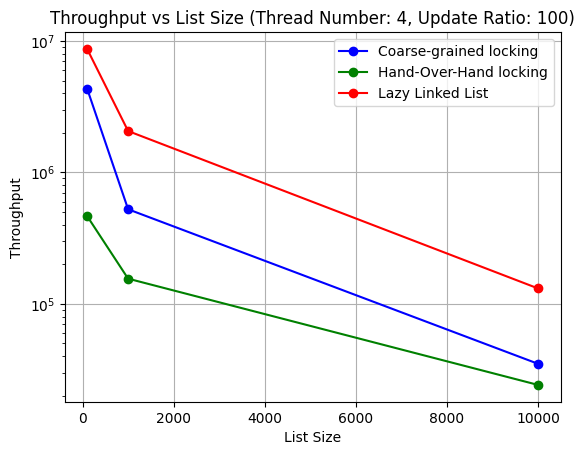

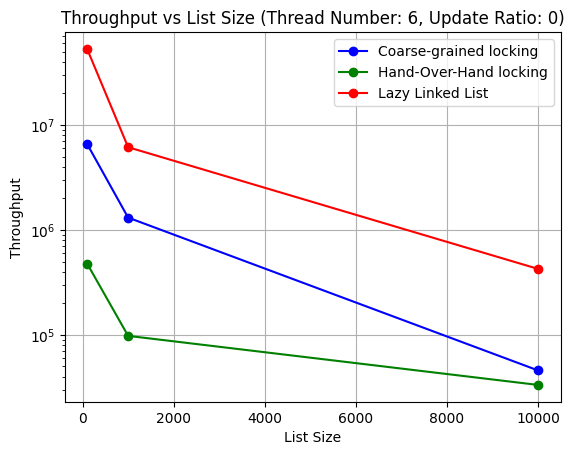

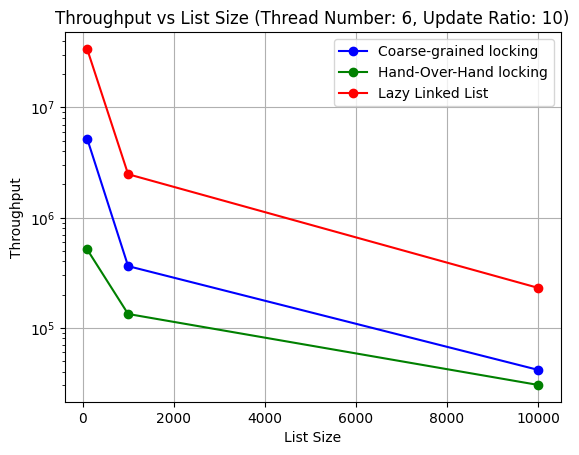

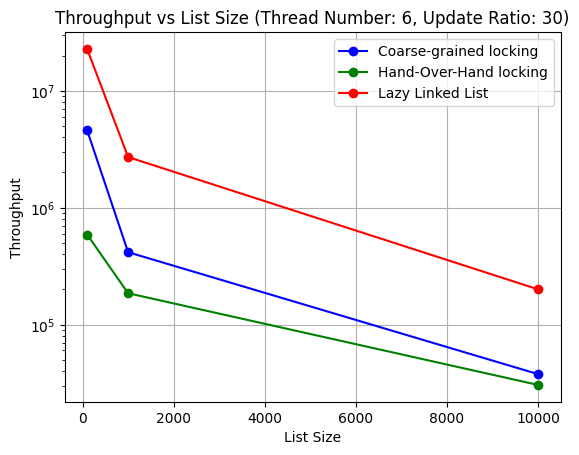

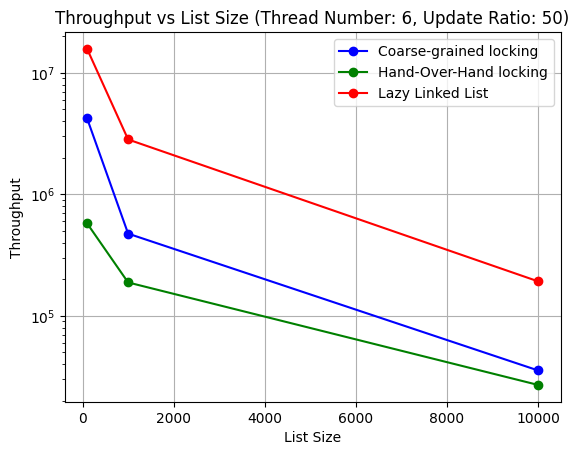

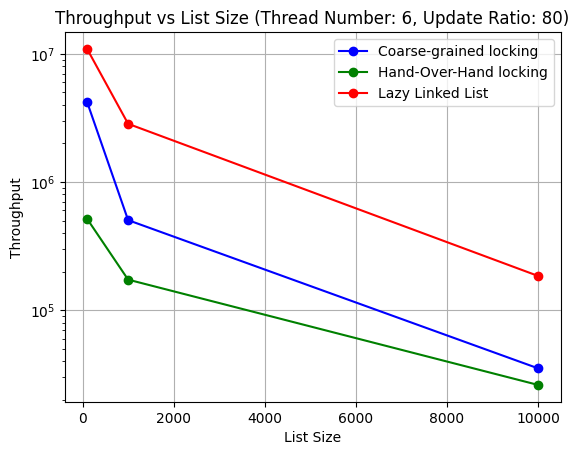

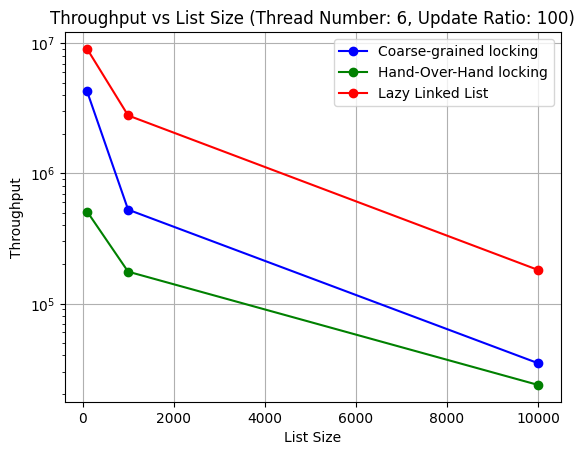

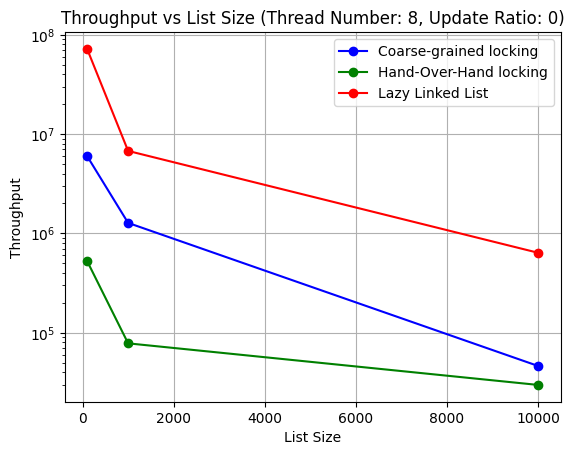

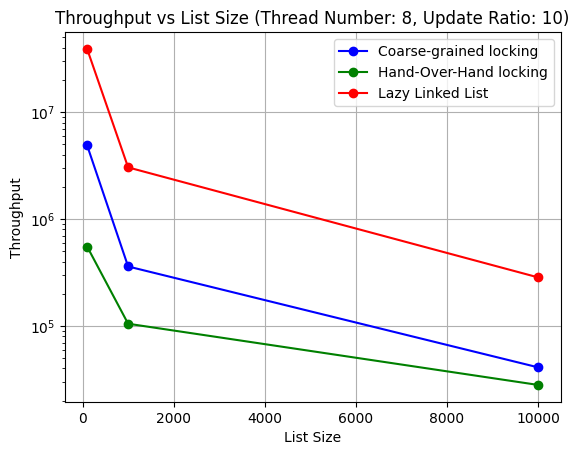

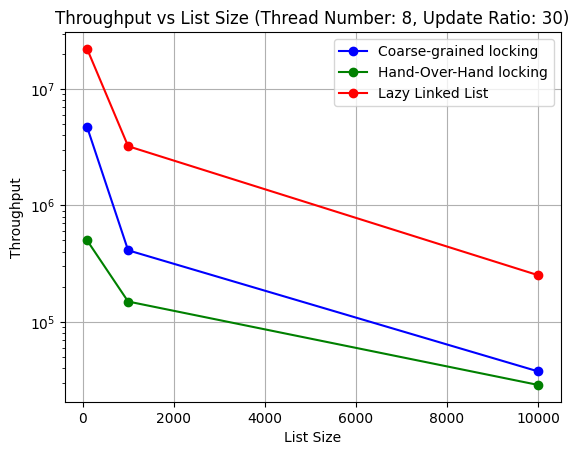

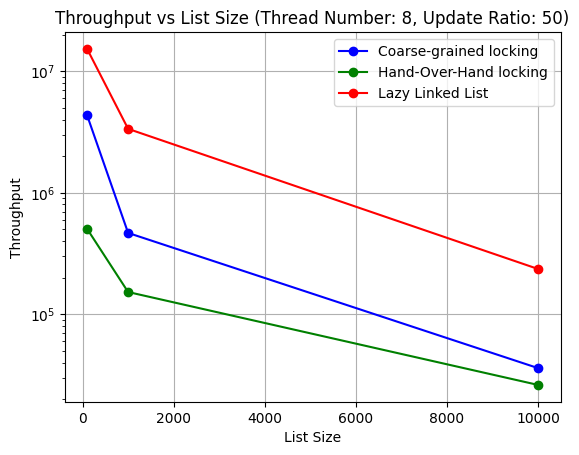

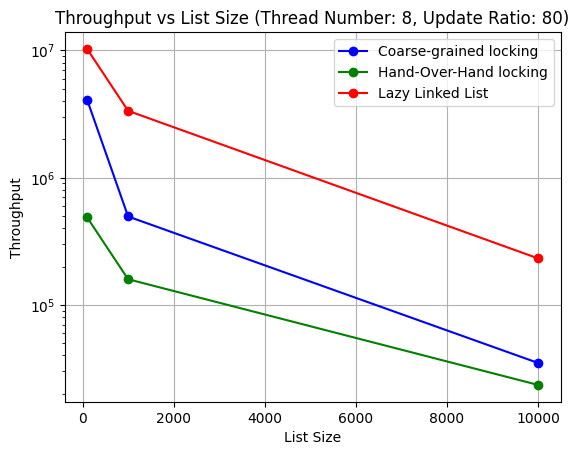

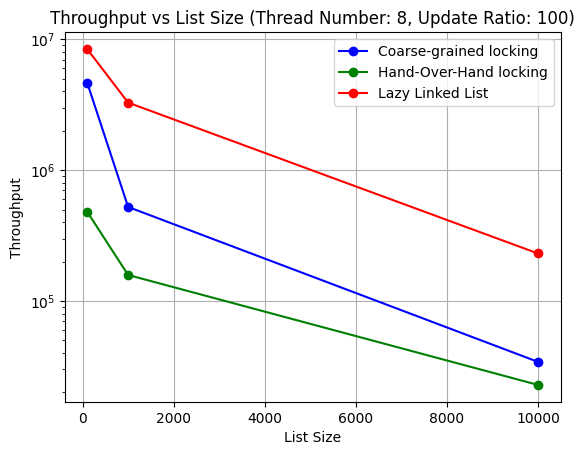

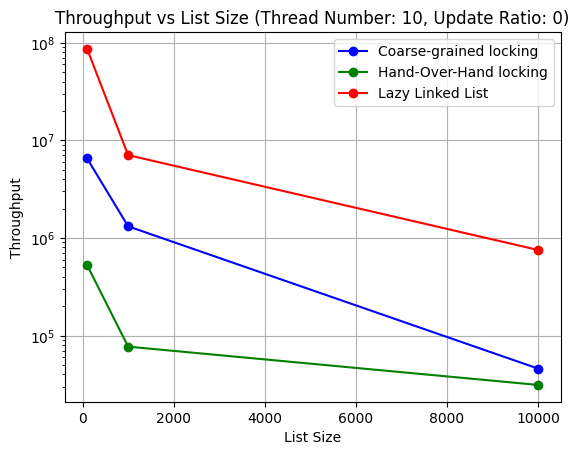

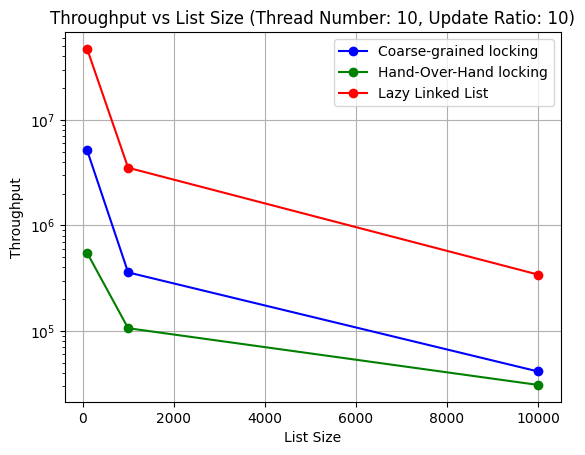

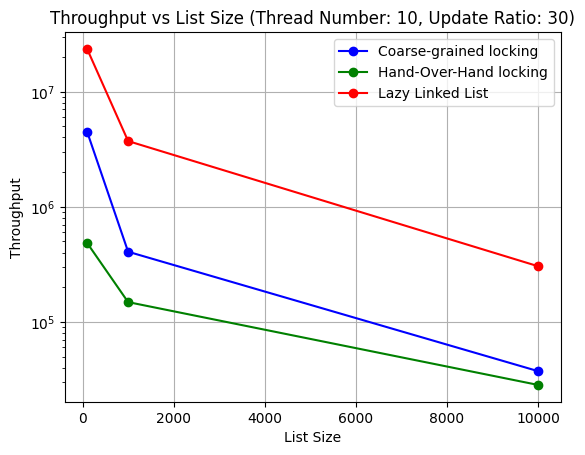

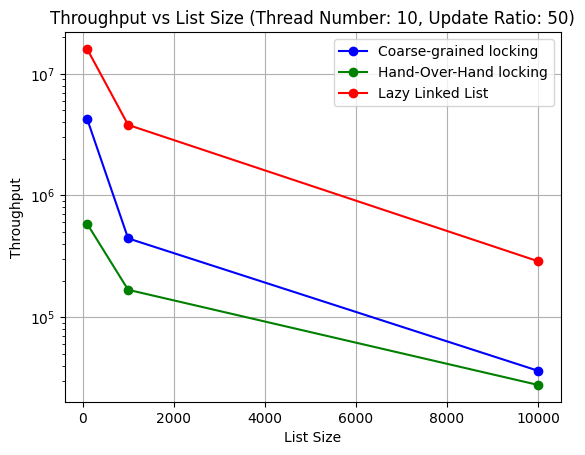

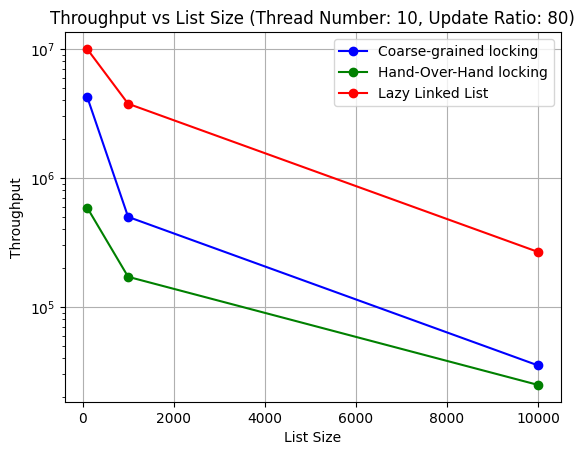

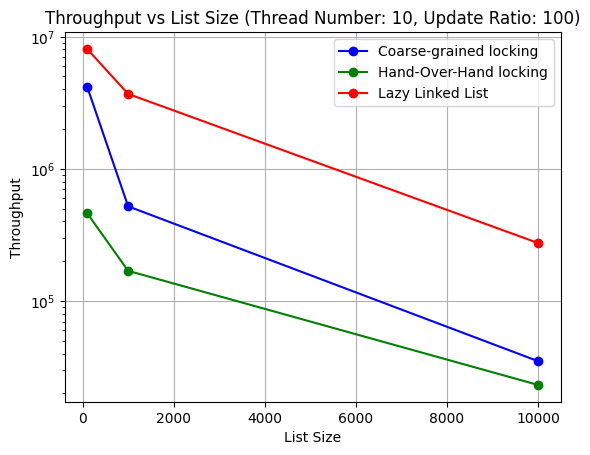

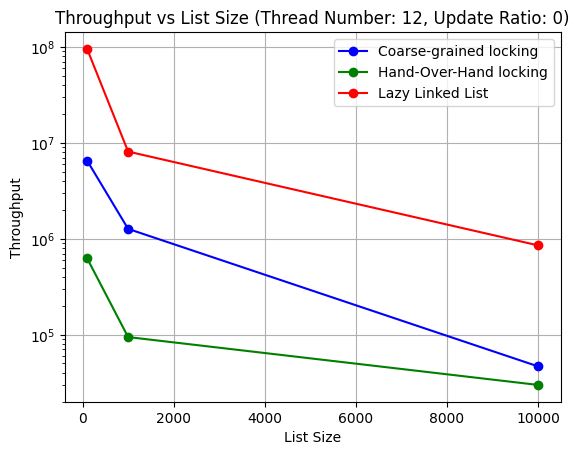

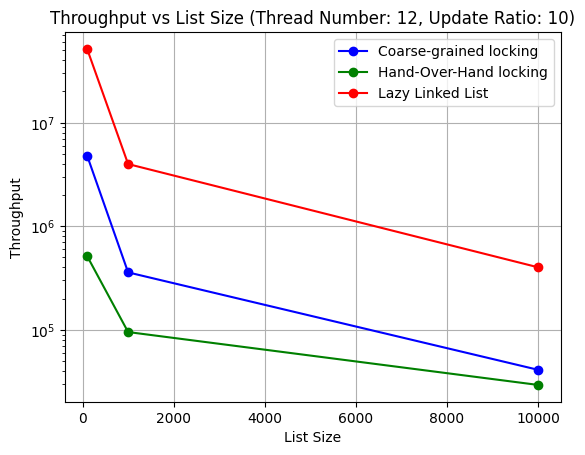

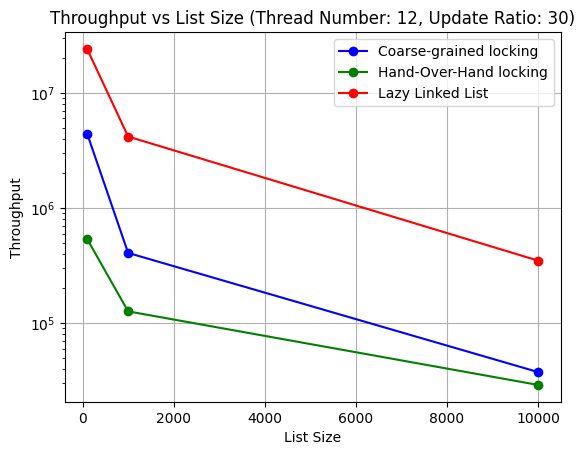

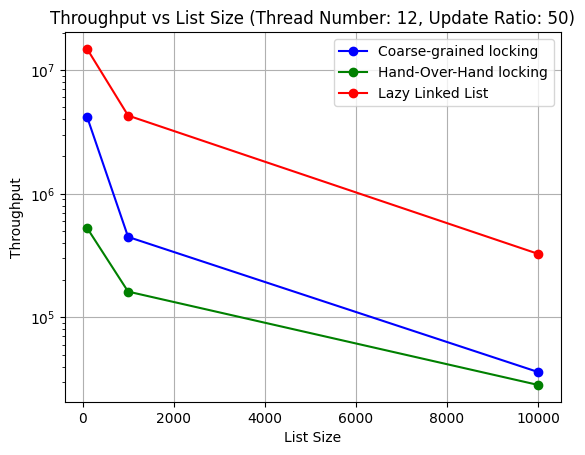

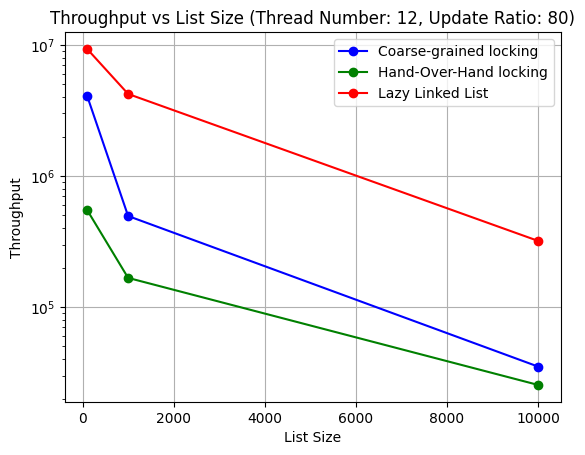

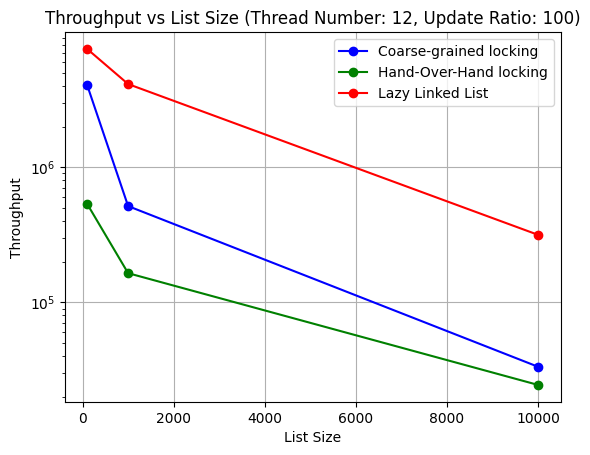

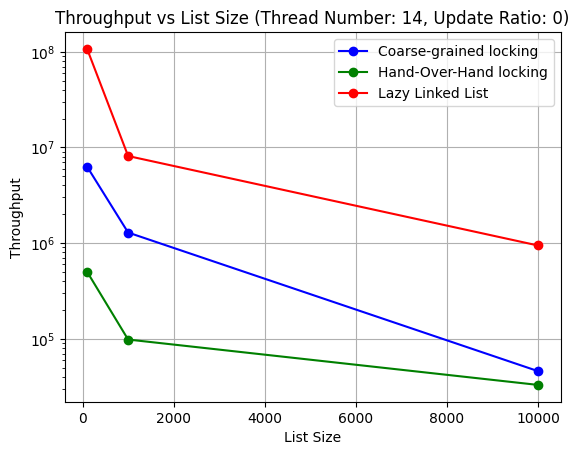

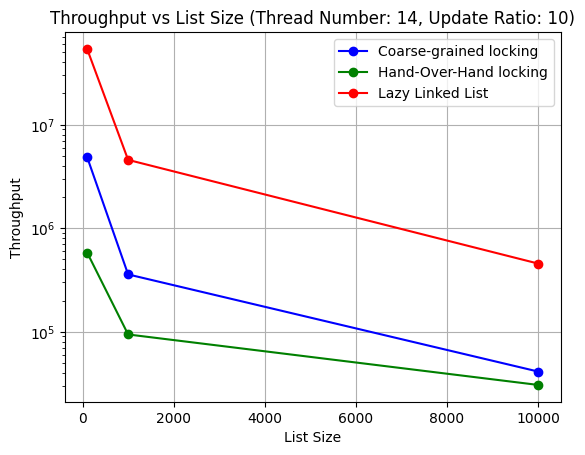

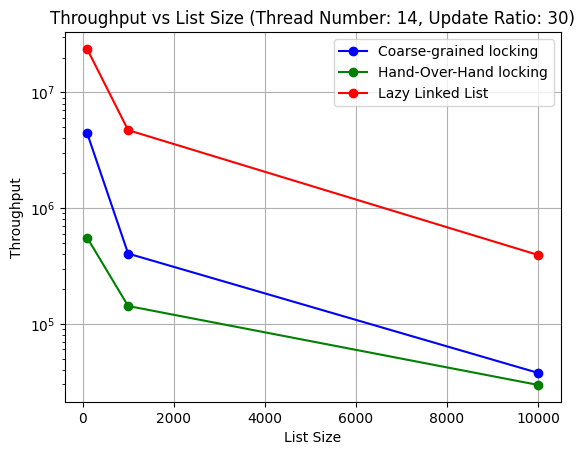

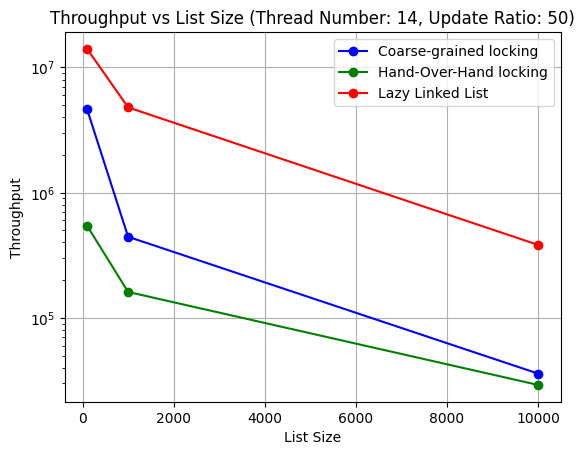

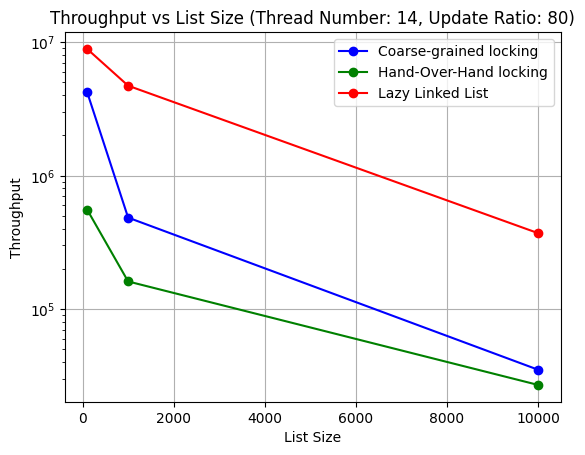

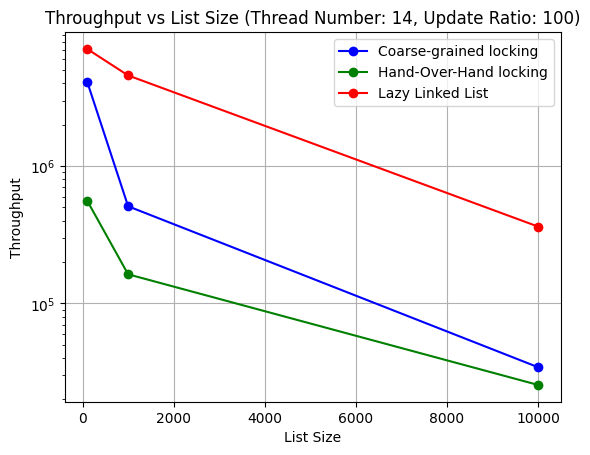

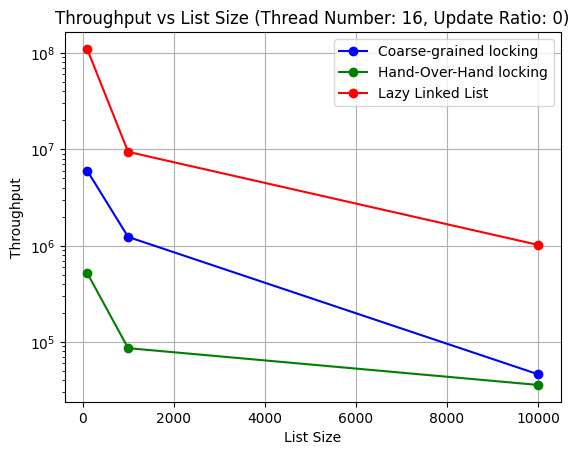

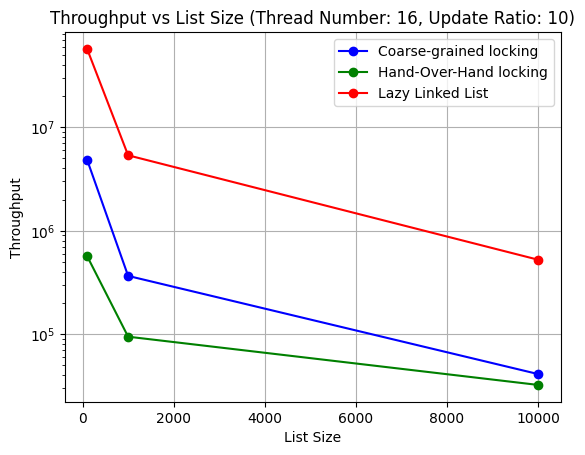

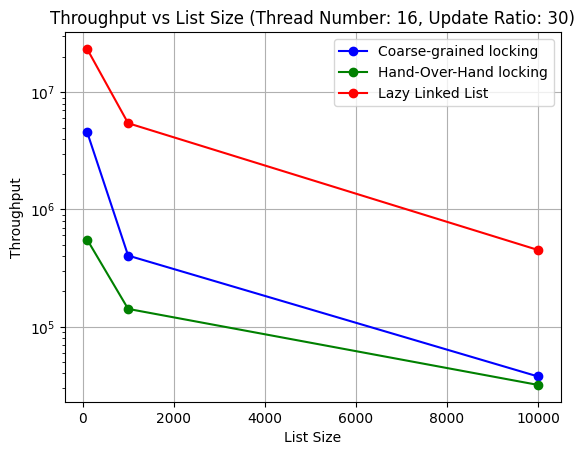

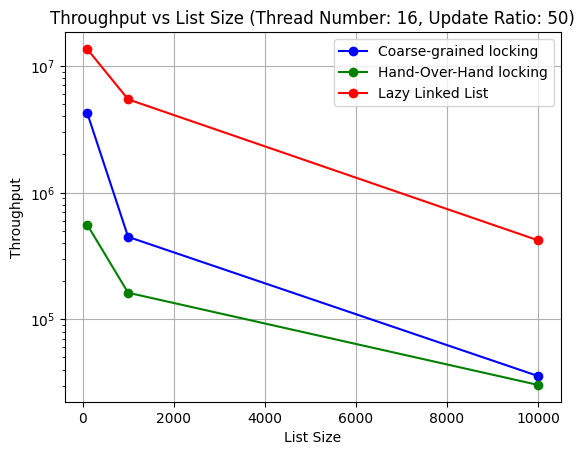

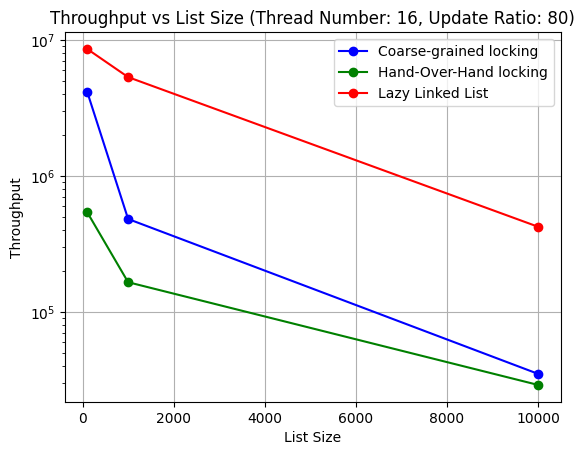

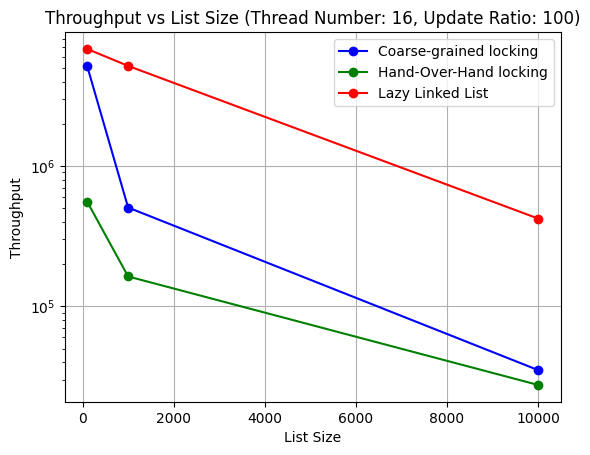

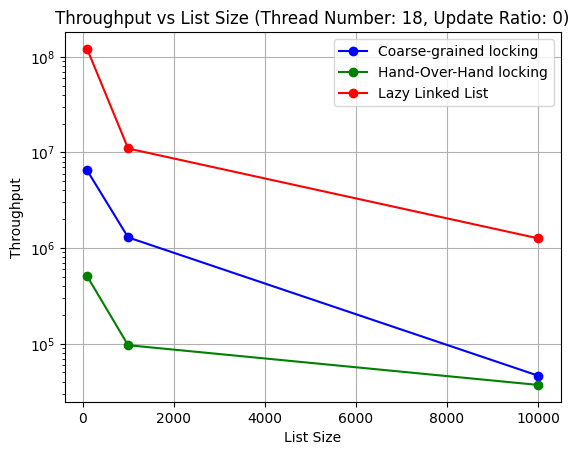

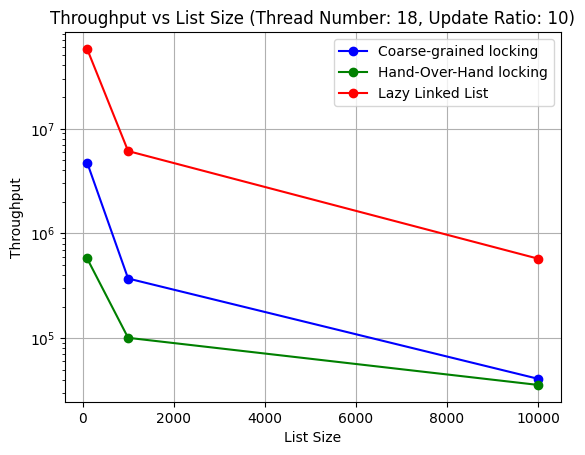

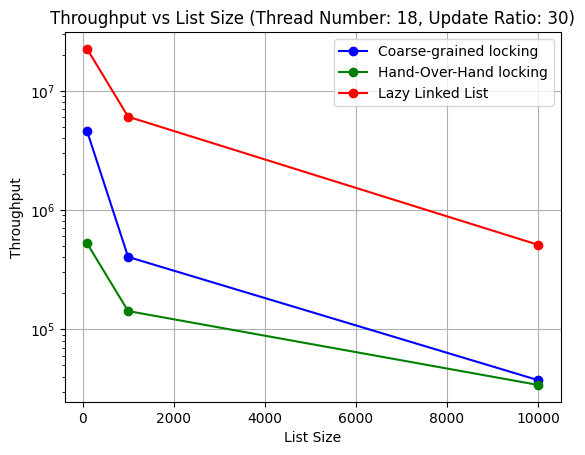

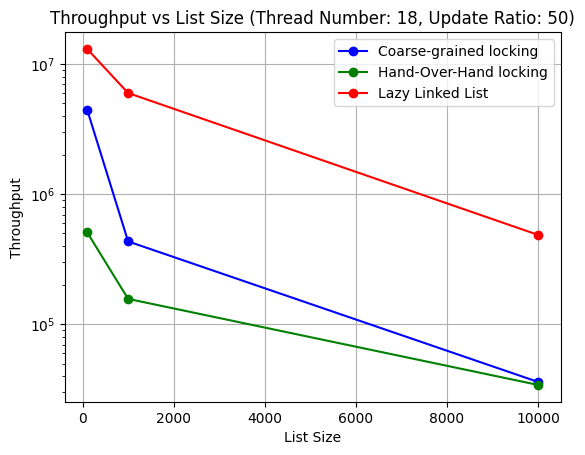

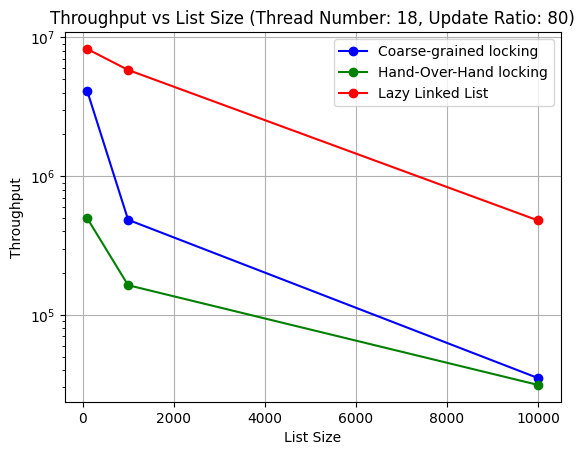

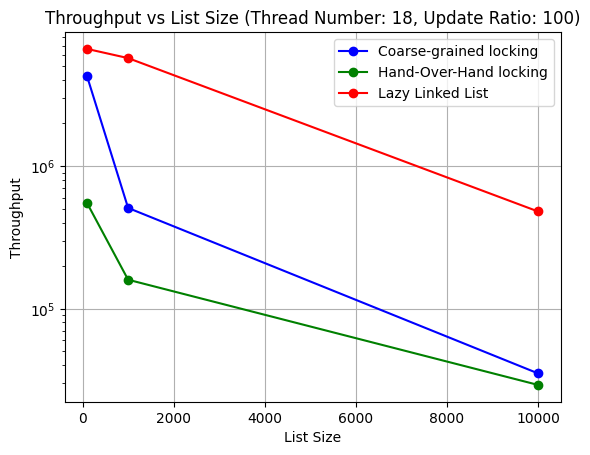

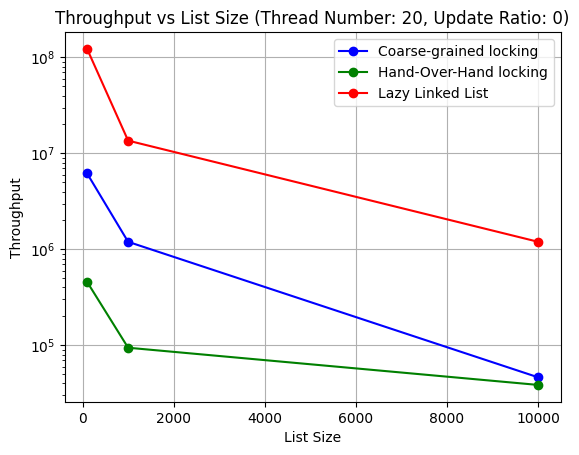

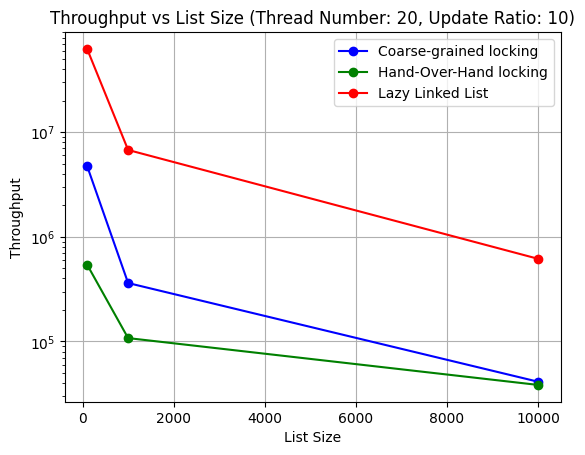

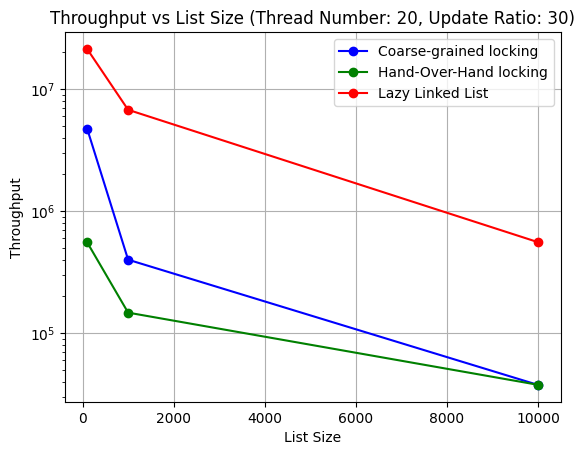

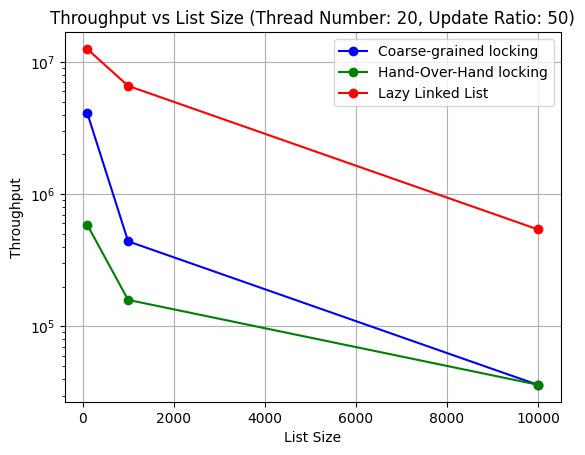

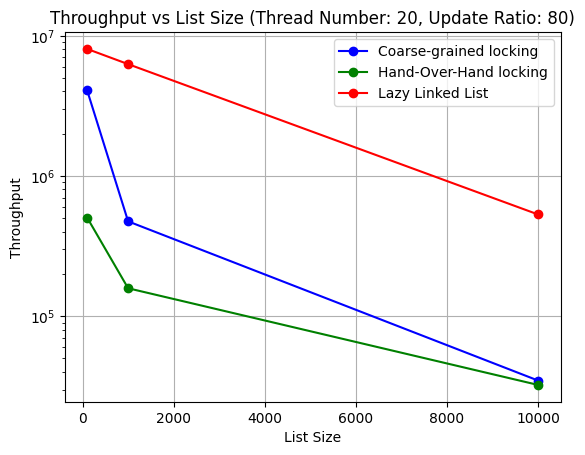

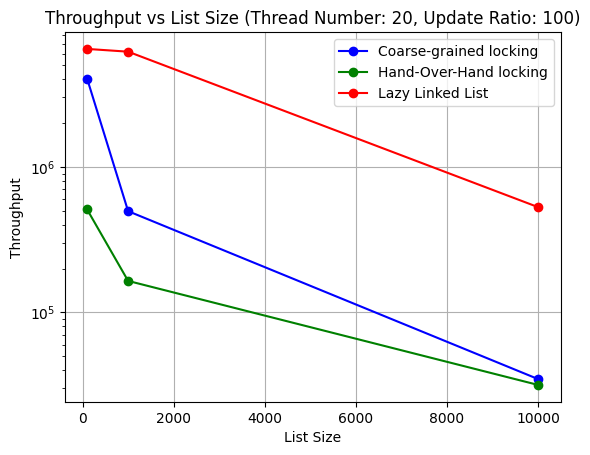

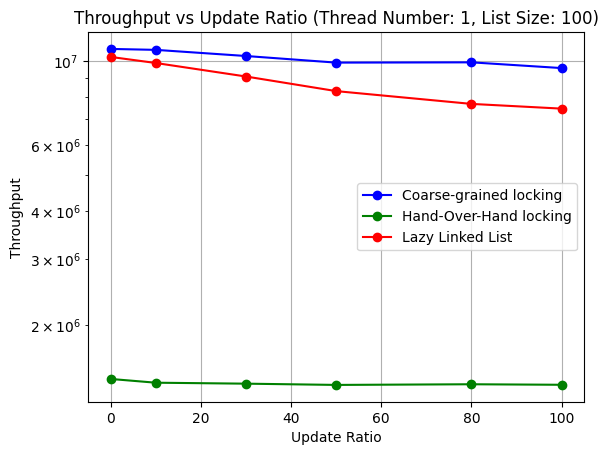

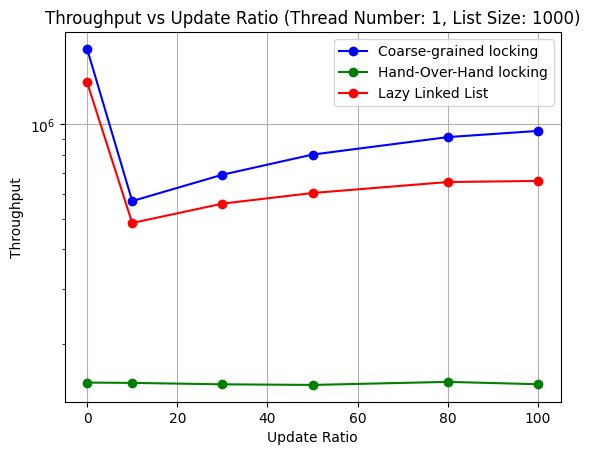

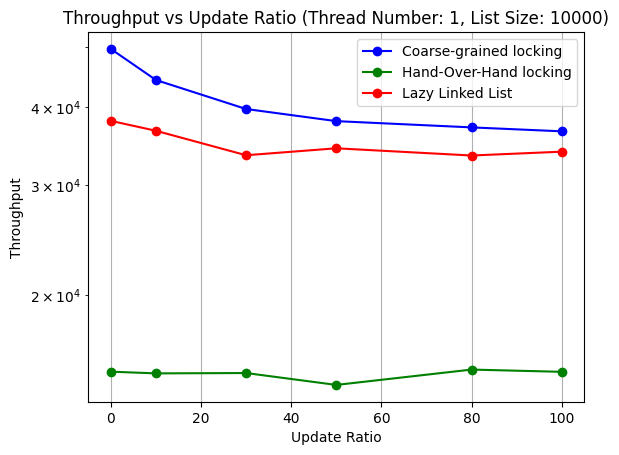

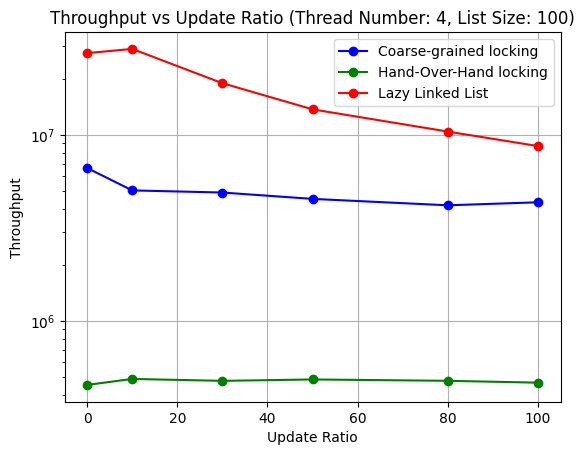

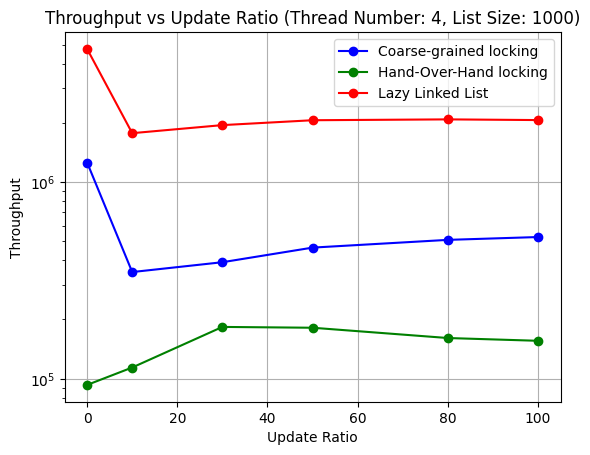

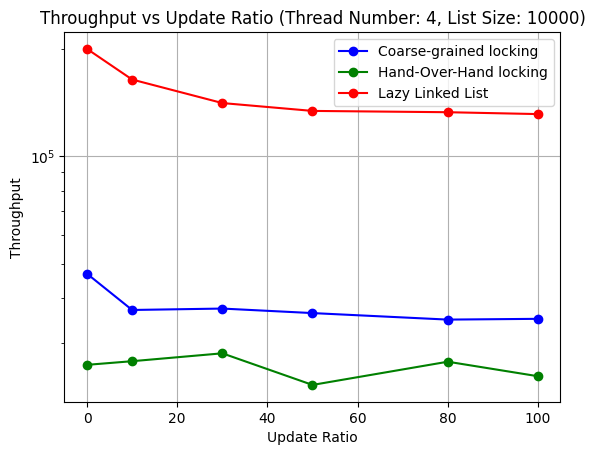

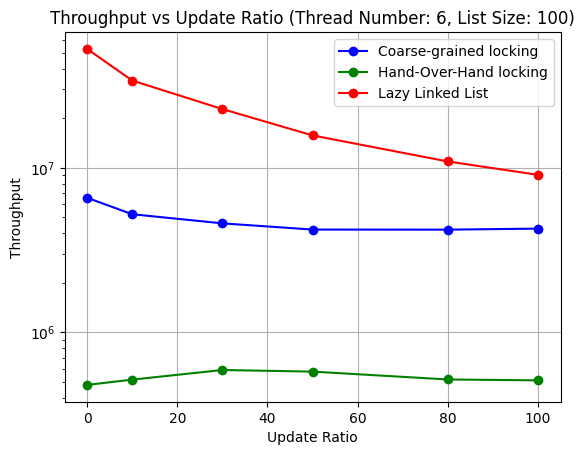

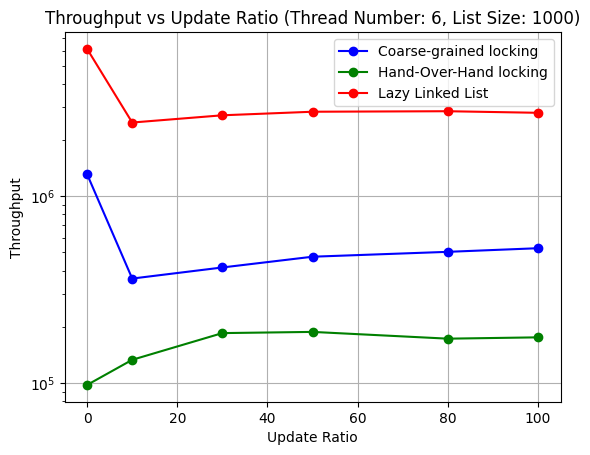

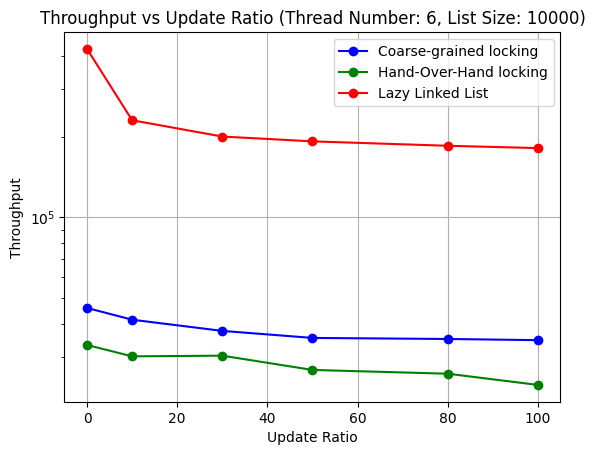

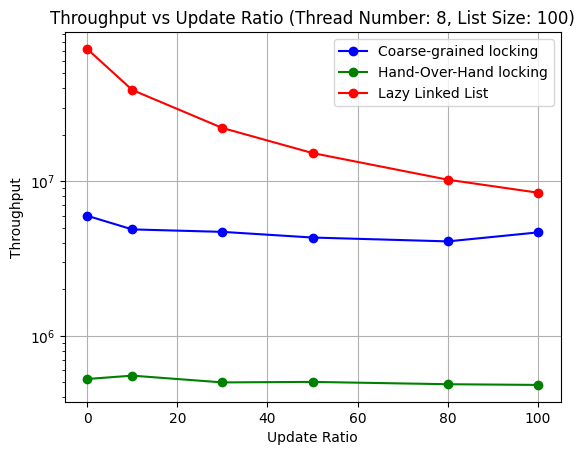

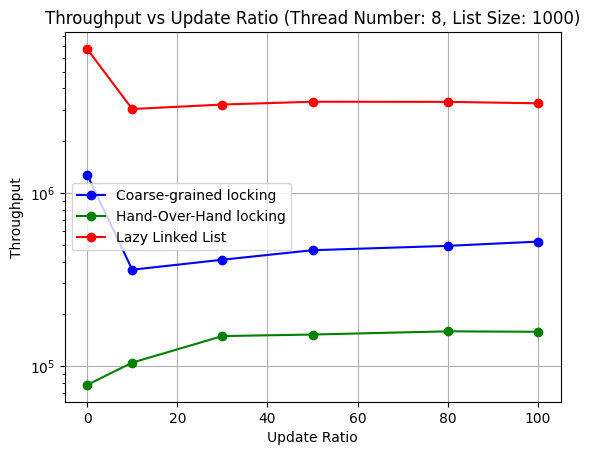

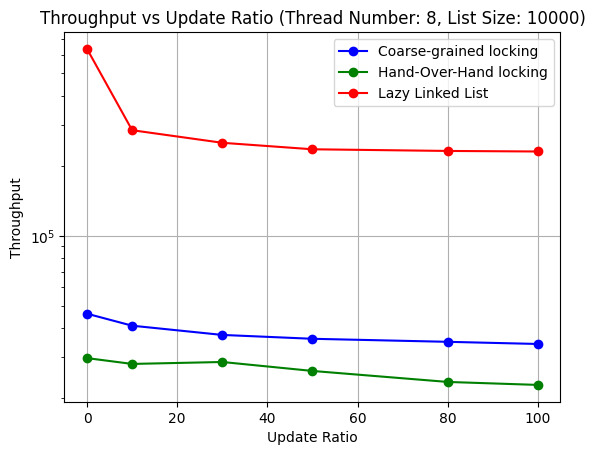

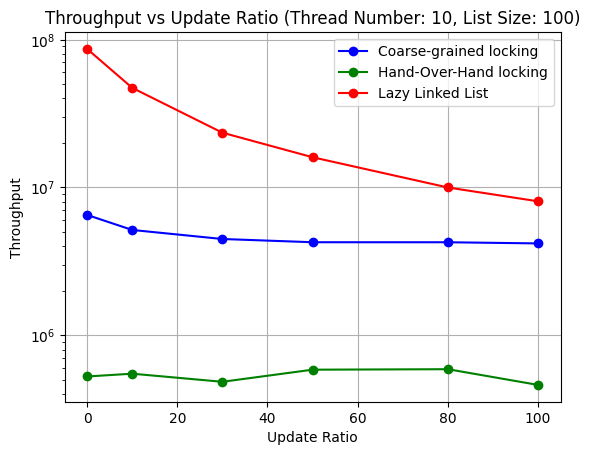

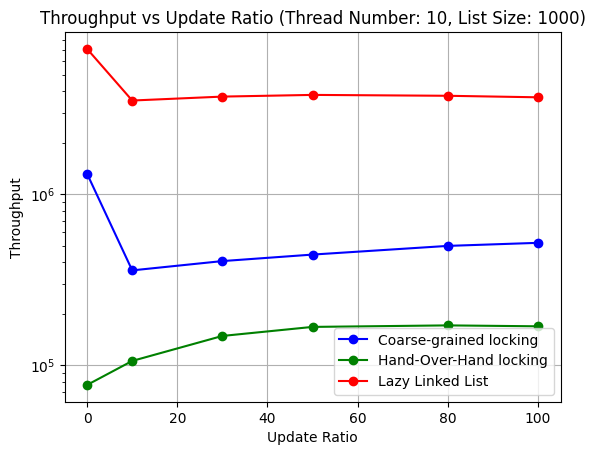

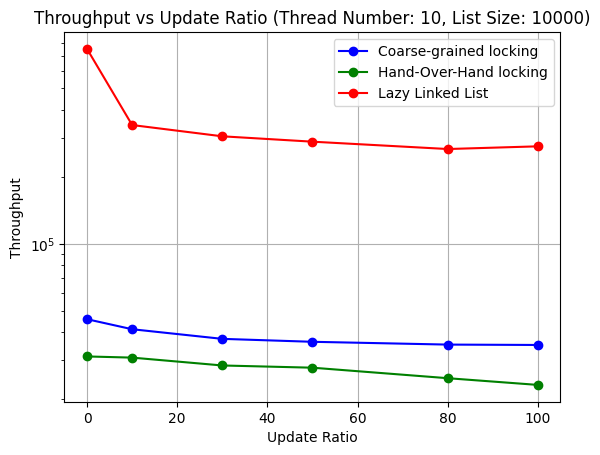

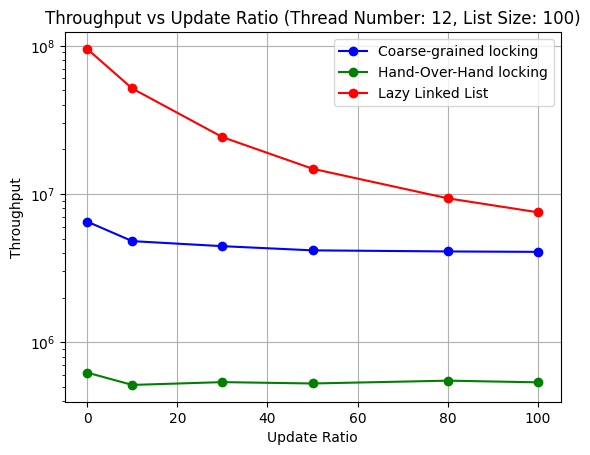

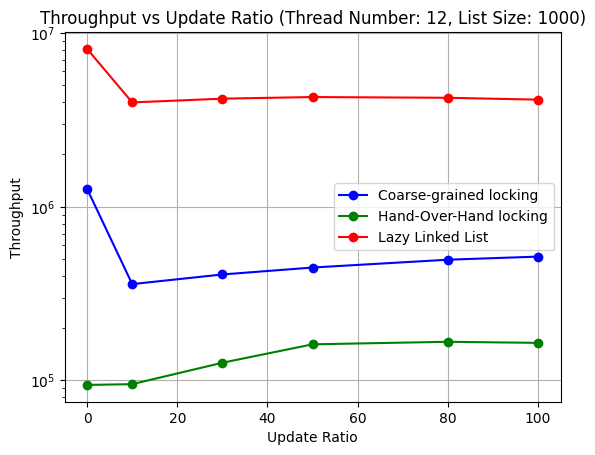

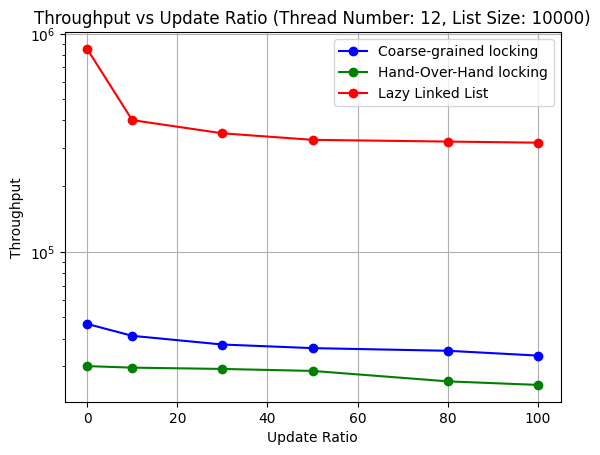

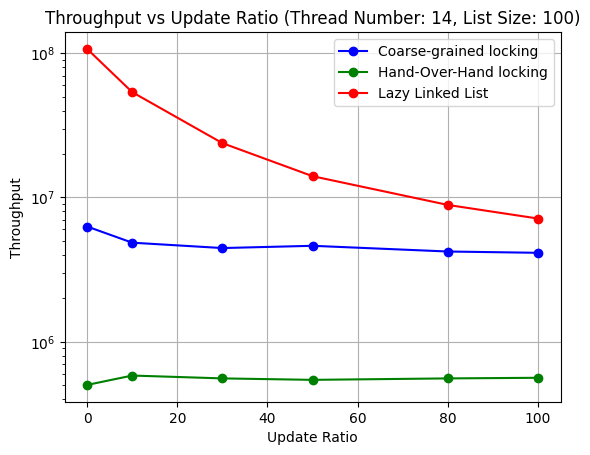

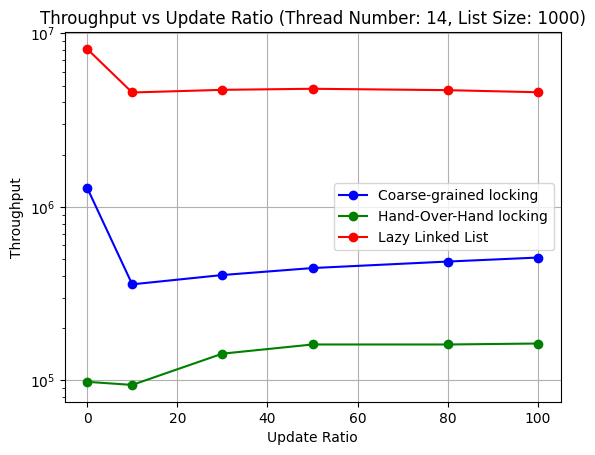

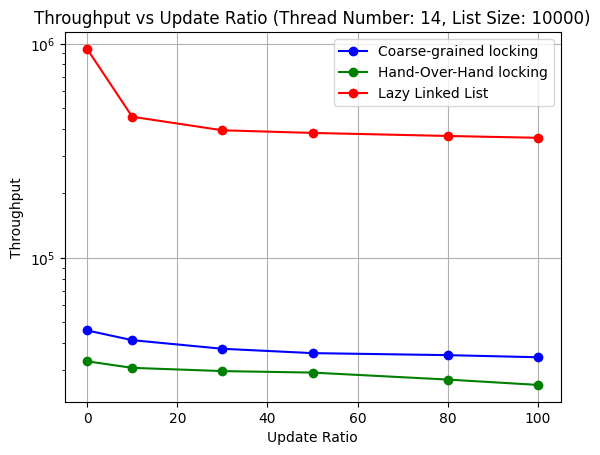

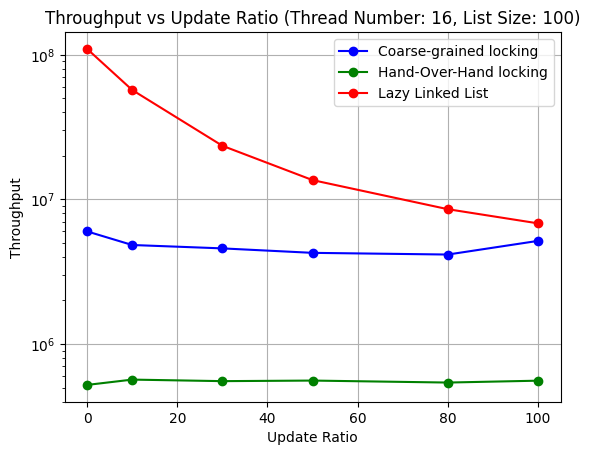

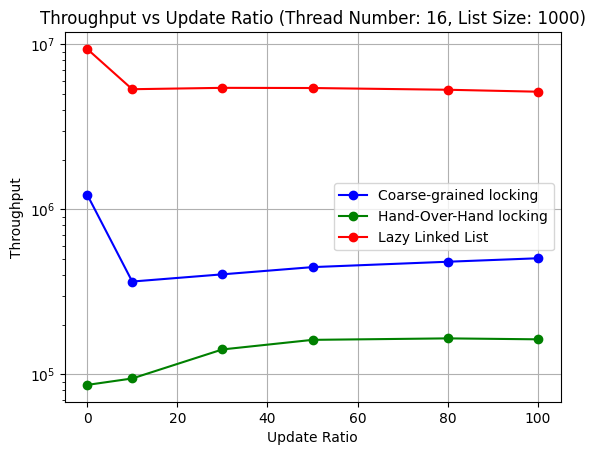

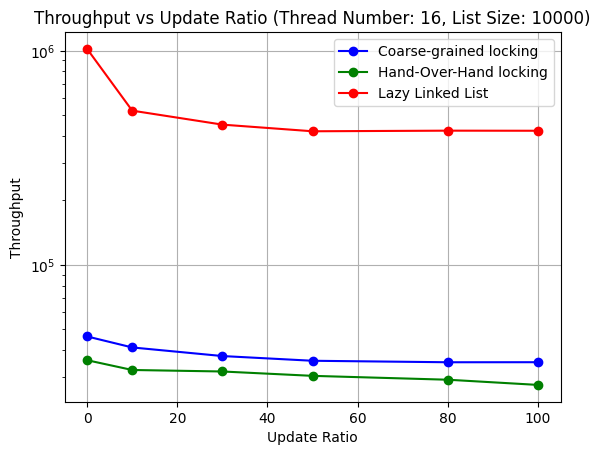

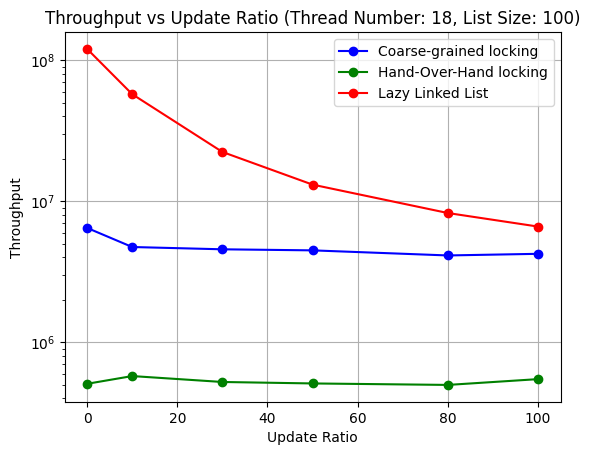

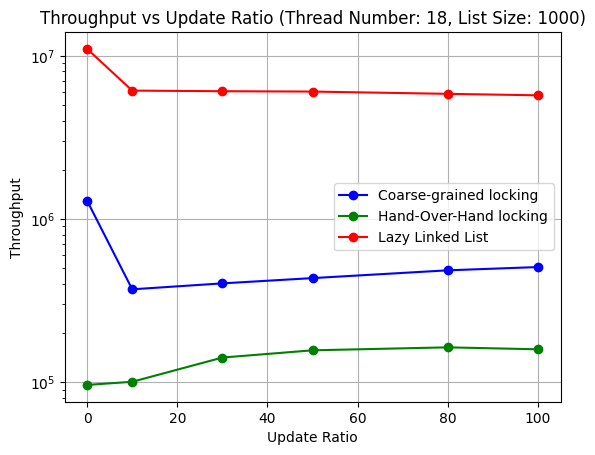

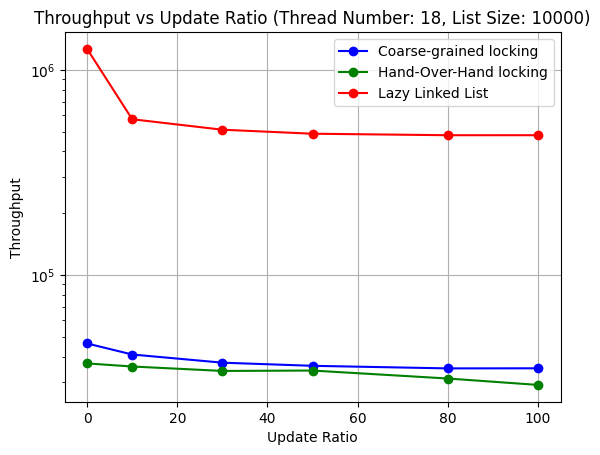

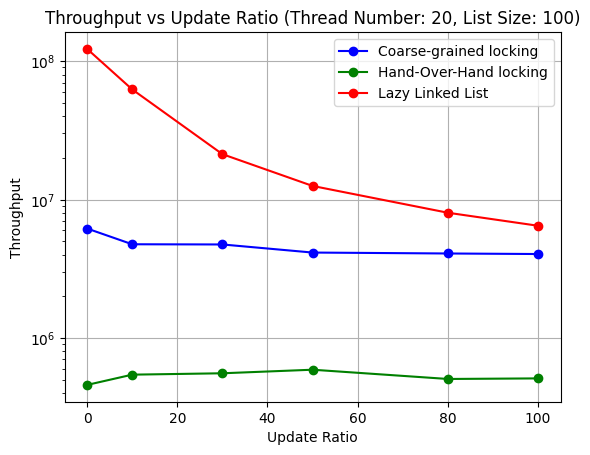

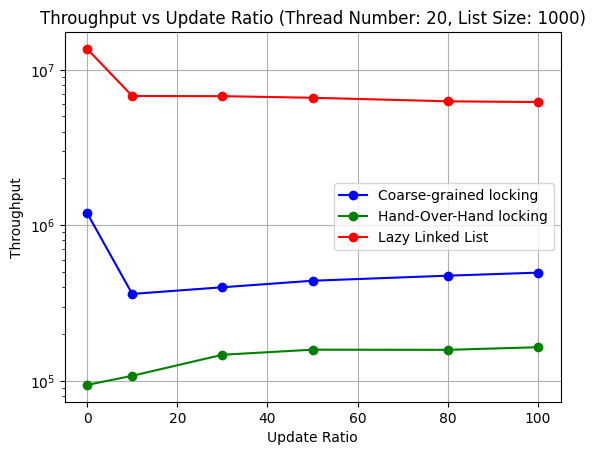

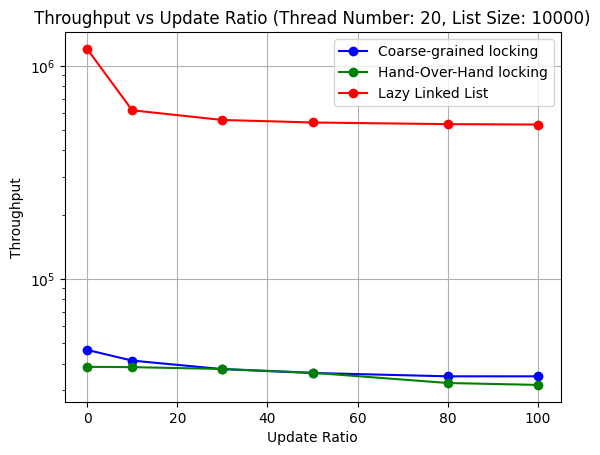

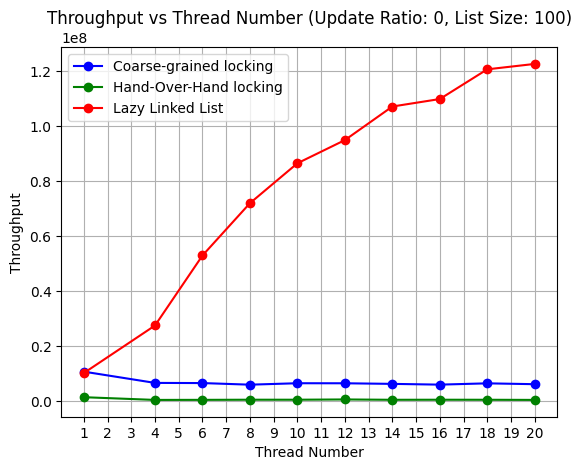

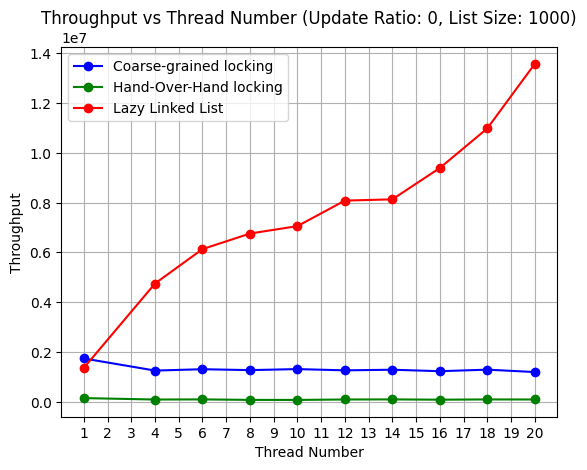

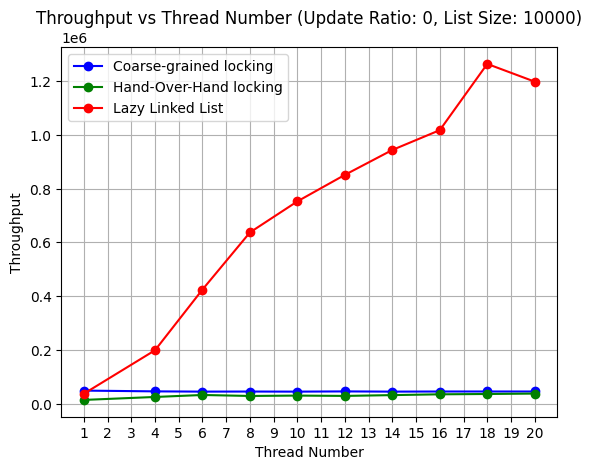

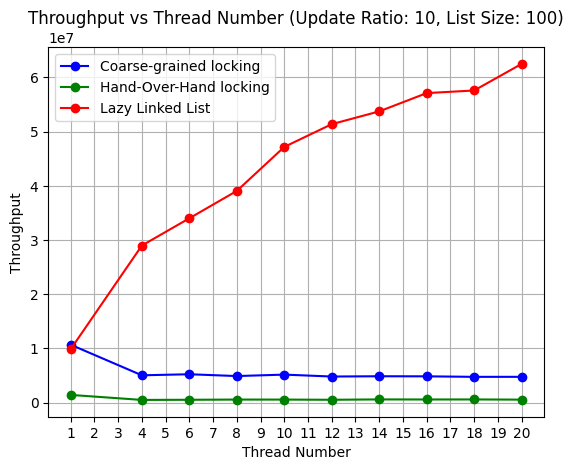

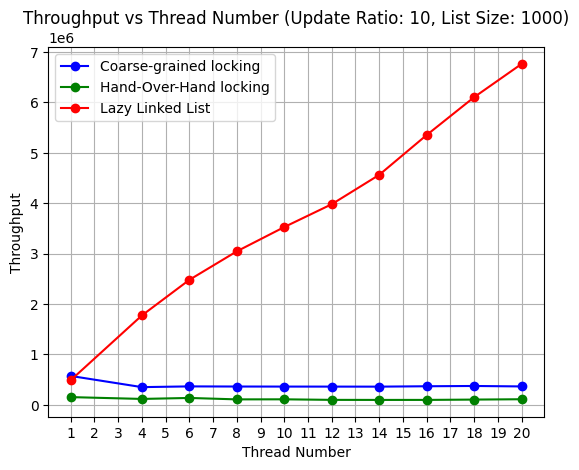

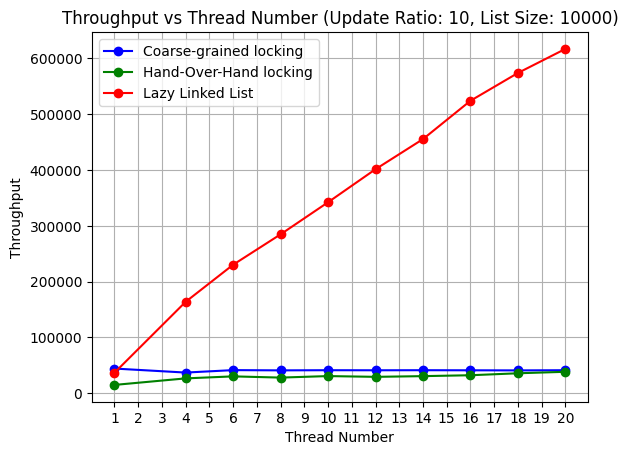

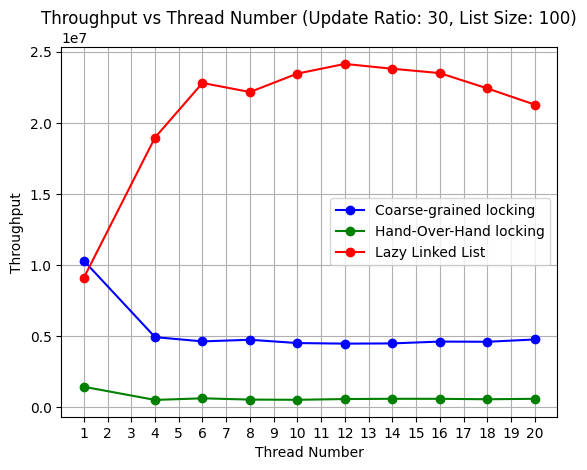

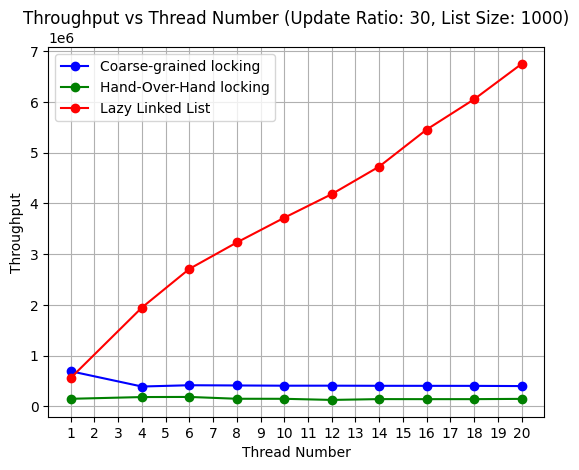

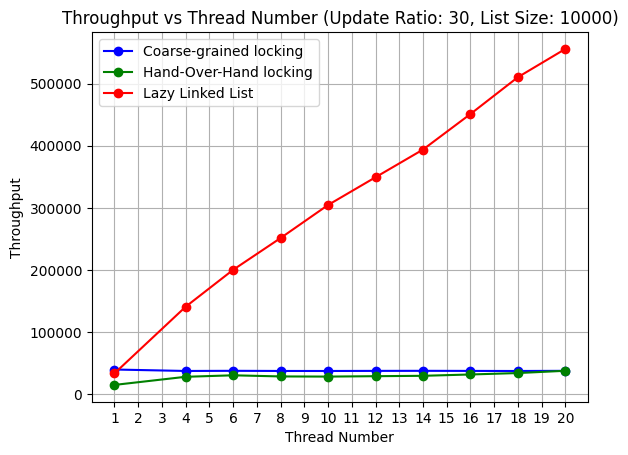

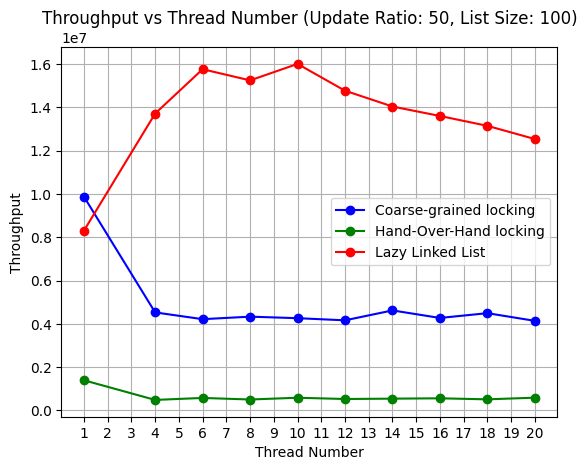

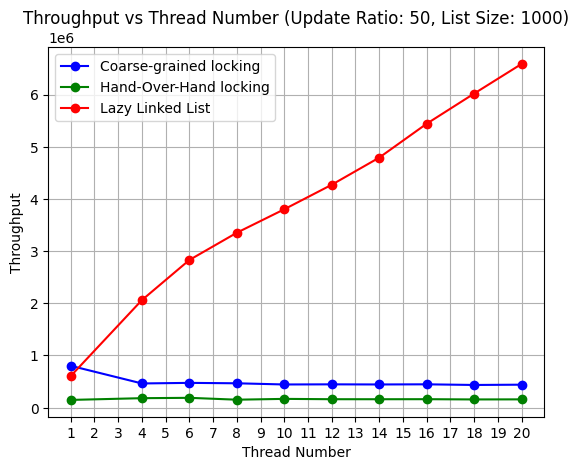

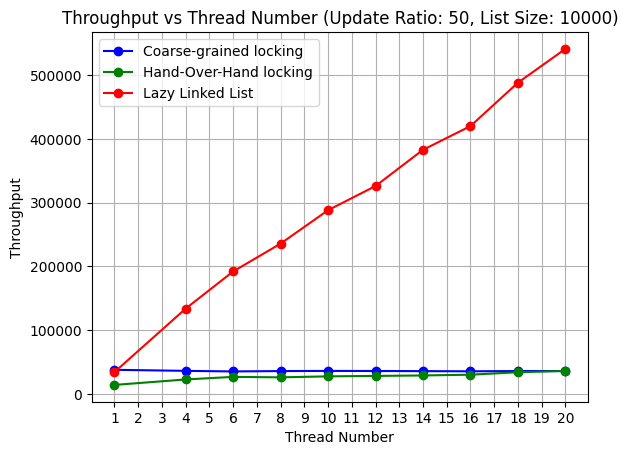

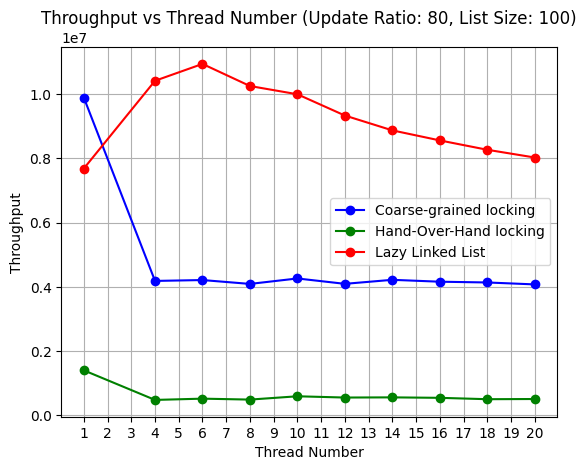

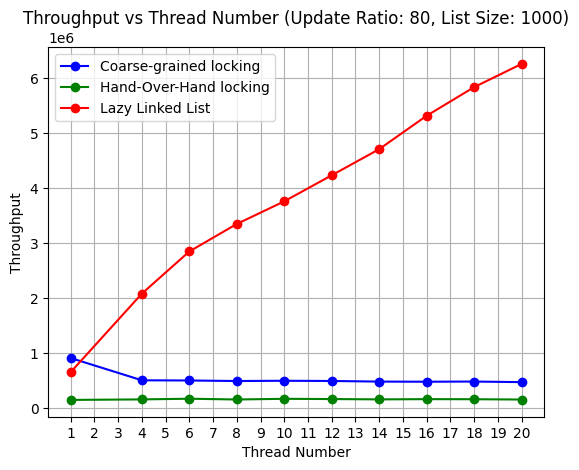

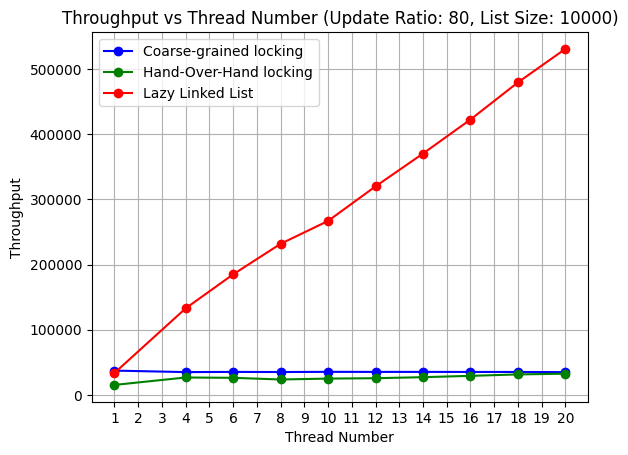

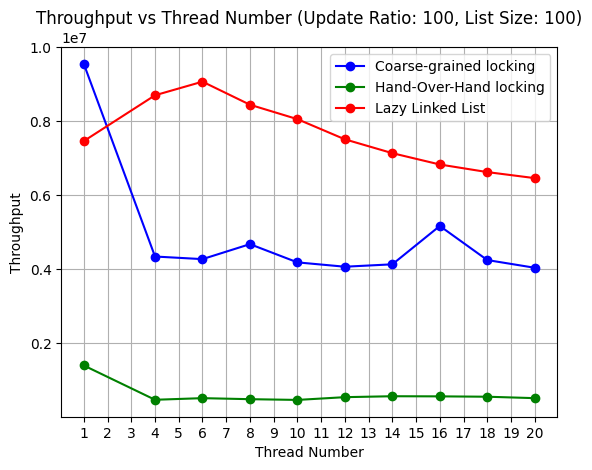

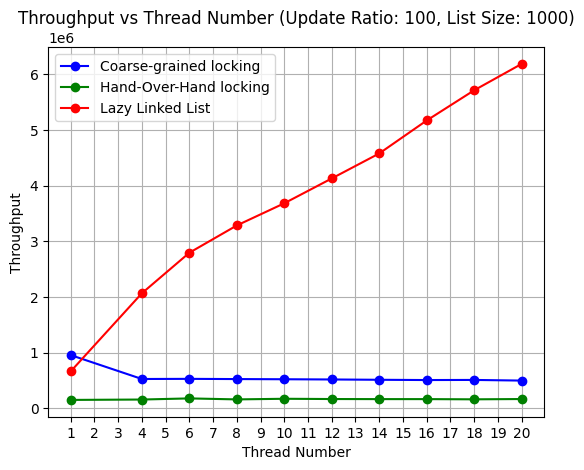

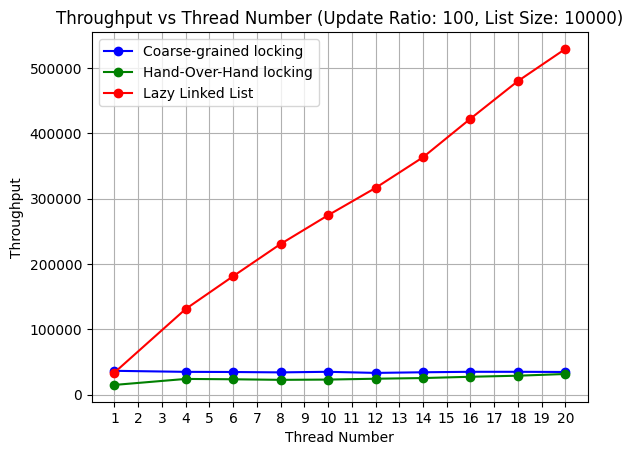

In [6]:
from matplotlib.ticker import MultipleLocator
import os
import matplotlib.pyplot as plt

params = [thread_nums, update_ratios, list_sizes]

plot_folder = "plots"
if not os.path.exists(plot_folder):
    os.mkdir(plot_folder)

for thread_num in thread_nums:
    for update_ratio in update_ratios:
        filtered_df = df.xs((thread_num, update_ratio), level=('thread_num', 'update_ratio'))
        
        color_map = {'Coarse-grained locking': 'b', 'Hand-Over-Hand locking': 'g', 'Lazy Linked List ': 'r'}
        
        # plt.figure(figsize=(12, 6))
        
        for t in filtered_df.index.get_level_values('type').unique():
            data = filtered_df.xs(t, level='type')
            list_size = data.index.get_level_values('list_size')
            throughput = data['throughput']
            plt.plot(list_size, throughput, 'o-', label=f'{t}', color=color_map[t])
                
        plt.yscale('log')
        plt.xlabel('List Size')
        plt.ylabel('Throughput')
        plt.title(f'Throughput vs List Size (Thread Number: {thread_num}, Update Ratio: {update_ratio})')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(plot_folder, f"thread_num_{thread_num}_update_ratio_{update_ratio}.png" ))
        plt.show()


for thread_num in thread_nums:
    for list_size in list_sizes:
        filtered_df = df.xs((thread_num, list_size), level=('thread_num', 'list_size'))
        
        color_map = {'Coarse-grained locking': 'b', 'Hand-Over-Hand locking': 'g', 'Lazy Linked List ': 'r'}
        
        # plt.figure(figsize=(12, 6))
        
        for t in filtered_df.index.get_level_values('type').unique():
            data = filtered_df.xs(t, level='type')
            update_ratio = data.index.get_level_values('update_ratio')
            throughput = data['throughput']
            plt.plot(update_ratio, throughput, 'o-', label=f'{t}', color=color_map[t])
        
        plt.yscale('log')
        plt.xlabel('Update Ratio')
        plt.ylabel('Throughput')
        plt.title(f'Throughput vs Update Ratio (Thread Number: {thread_num}, List Size: {list_size})')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(plot_folder, f"thread_num_{thread_num}_list_size_{list_size}.png" ))
        plt.show()
    
for update_ratio in update_ratios:
    for list_size in list_sizes:
        filtered_df = df.xs((update_ratio, list_size), level=('update_ratio', 'list_size'))
        
        color_map = {'Coarse-grained locking': 'b', 'Hand-Over-Hand locking': 'g', 'Lazy Linked List ': 'r'}
        
        # plt.figure(figsize=(12, 6))
        
        for t in filtered_df.index.get_level_values('type').unique():
            data = filtered_df.xs(t, level='type')
            thread_num = data.index.get_level_values('thread_num')
            throughput = data['throughput']
            plt.plot(thread_num, throughput, 'o-', label=f'{t}', color=color_map[t])
                
        x_locator = MultipleLocator(base=1.0)  # Set grid lines at integer values
        plt.gca().xaxis.set_major_locator(x_locator)
        plt.xlabel('Thread Number')
        plt.ylabel('Throughput')
        plt.title(f'Throughput vs Thread Number (Update Ratio: {update_ratio}, List Size: {list_size})')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(plot_folder, f"update_ratio_{update_ratio}_list_size_{list_size}.png" ))
        plt.show()
